In [2]:
# 정규방정식 테스트

import numpy as np

X = 2*np.random.rand(100,1)
y=4+3*X+np.random.rand(100,1)

In [6]:
'''theta^hat 계산
넘파이 선형대수 모듈 (np.linalg)의 inv() 함수를 이용해 역행렬 계산
dot() 메서드: 행렬 곱셈'''

X_b = np.c_[np.ones((100,1)), X]    # 모든 샘플에 X0=1을 추가한다
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[4.46392947],
       [3.03526237]])

In [7]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2,1)), X_new]  # 모든 샘플에 X0=1을 추가한다
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.46392947],
       [10.53445421]])

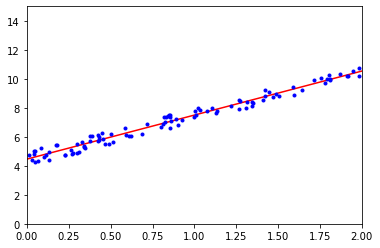

In [9]:
import matplotlib as mpl
import matplotlib.pyplot as plt

plt.plot(X_new, y_predict, 'r-')
plt.plot(X, y, 'b.')
plt.axis([0, 2, 0, 15])
plt.show()

In [10]:
'''사이킷런에서 선형 회귀 수행'''

from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

In [11]:
lin_reg.intercept_, lin_reg.coef_, lin_reg.predict(X_new)

(array([4.46392947]),
 array([[3.03526237]]),
 array([[ 4.46392947],
        [10.53445421]]))

In [12]:
'''
LinearRegression 클래스는 scipy.linalg.lstsq() 함수를 기반으로 하며, 이 함수는 직접 호출할 수 있다.
'''

theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond = 1e-6)  
                                # rcond = SVD 과정에서 singular value cut-off threshold - 해당 설정값보다 작으면 0취급
theta_best_svd

array([[4.46392947],
       [3.03526237]])

In [13]:
'''Psedoinverse (유사역행렬) 계산'''

np.linalg.pinv(X_b).dot(y)

array([[4.46392947],
       [3.03526237]])

pseudo-inverse는 SVD를 통해 계산된다.


In [16]:
eta = 0.1   # learning rate
n_iteration = 1000
m = 100

theta = np.random.randn(2,1)    # Random initialization

for iteration in range(n_iteration):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta)-y)
    theta = theta - eta*gradients

theta       # 정규 방정식으로 얻은 것과 결과값이 같다

array([[4.46392947],
       [3.03526237]])

In [ ]:
'''Stochastic gradient descent'''

n_epochs = 50
t0, t1 = 5, 50 # 학습 스케줄 하이퍼파라미터

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)    # random initialization

for epoch in range(n_epochs):
    for i in range(m):      # m: 훈련 데이터의 샘플 수 - 이 경우 1 epoch: m번의 iteration
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2*xi.T.dot(xi.dot(theta)-yi)
        eta = learning_schedule(epoch*m+i)
        theta = theta - eta*gradients


In [17]:
'''Stochastic gradient descent'''

from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X,y.ravel())

sgd_reg.intercept_, sgd_reg.coef_

(array([4.45590447]), array([3.05427368]))

In [18]:
'''다항 회귀'''

m = 100
X = 6*np.random.rand(m,1)-3
y = 0.5*X**2 +X + 2 + np.random.randn(m,1)

In [19]:
''' 
직선이 맞지 않는 데이터 분포 형태를 제곱 형태로 데이터 변환 시켜주어 직선 그래프에 맞도록 변형시켜준다
'''
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias = False)
X_poly = poly_features.fit_transform(X)
X[0], X_poly[0]

(array([-0.40857429]), array([-0.40857429,  0.16693295]))

In [20]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([2.22769542]), array([[1.04268652, 0.44020331]]))

In [24]:
'''학습 곡선 확인을 통한 over/under fitting 확인'''

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), 'r-+', linewidth = 2, label = '훈련 세트')
    plt.plot(np.sqrt(val_errors), 'b-', linewidth = 3, label = '검증 코드')

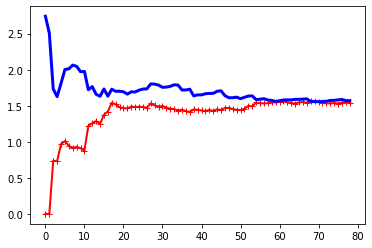

In [25]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

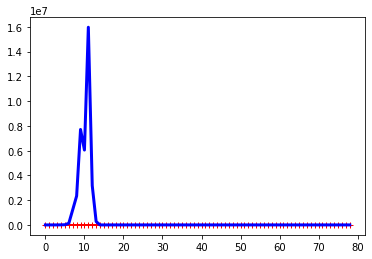

In [31]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ('poly_features', PolynomialFeatures(degree=10, include_bias = False)),
    ('lin_reg', LinearRegression()),
])

plot_learning_curves(polynomial_regression, X, y)